<a href="https://colab.research.google.com/github/DrMorganJones/ACS6427/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratory Class Three  : Classification**

## 1. Learning Objectives

This lab supplements the lecture material on classification. The intended learning outcomes of this lab are as follows:
1. To be able to implement an algorithm to preform logistic regression.
2. To be able to implement the perception algorithm.

## 2. Background Material

**Classification:** Classification is a foundational concept in the fields of machine learning and statistics, representing a specific
form of supervised learning. It involves the task of assigning a discrete class label to a given data point, distinguishing it from
regression, which entails assigning a continuous output value to a given data point. In binary classification the data set is
usually denoted by $(x_i,y_i)_{i=1}^N \subset ℝ^n \times ℝ$ where the output labels, $\{y_i\}_{i=1}^N$ can only take two values, sometimes it is notationally convenient to make these values $\{0,1\}$ or $\{-1,1\}$.  The problem of binary classification can be visualized in Figure 1.
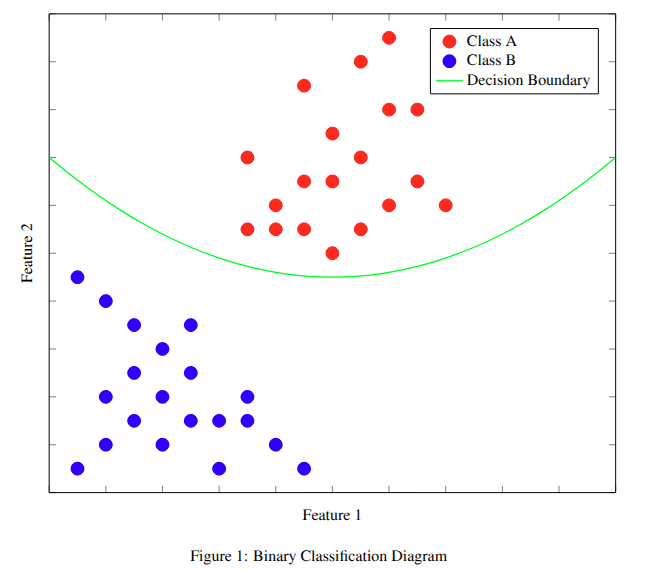



**Logistic Regression:** Logistic regression is a powerful and widely-used statistical technique. Unlike its name might suggest, logistic regression is primarily used for binary classification, not regression. At its core, logistic regression is designed to model the probability of a binary outcome. That is the goal is to find a function, f , such that

<p align="center"> $f(x)≈ \mathbb{P}(y = 1|x)$

It works by employing the logistic function, also known as the sigmoid function, to map input features to a probability
score within the range of 0 to 1. More specifically we look to find parameters $a_0,a_1 ∈ R$ such that the following model fits the
data
\begin{equation}
f(x;a_0,a_1)≈ \frac{e^{a_0+a^T_1x}}{1+e^{a_0+a^T_1x}}\tag{1}
\end{equation}

To fit a probability distribution to data $(xi
, yi)^N_{i=1}$, where $y_i ∈ {0,1}$ we maximize the likelihood of observing the data, that is
we must solve the following optimization problem:
\begin{equation}
	\max_{a_0,a_1}l(a_0,a_1):=  \mathbb{P}(\text{Observing labels } y_i \text{ given feature data } x_i \text { for } i \in \{1,...,N\} )\\
	=\mathbb{P}(y=y_i \text { for } i \in \{1,...,N\}| x_1,... x_n)\\
	= \prod_{i:y_i=+1} f(x_i; a_0, a_1)  \prod_{j:y_j=0} (1-f(x_j; a_0, a_1))\\ \nonumber
	 = \prod_{i=1}^N f(x_i; a_0, a_1)^{y_i} (1- f(x_i; a_0, a_1))^{1-y_i}.\tag{2}
\end{equation}

Equation (2) is an unconstrained optimization problem. We have seen in lectures we can attempt to solve this problem by taking the $log$ and differentiating to find a stationary point. The equation we derived to find the stationary point was a transcendental equation and hence has no close form solution.  We used Newton's method to approximately solved this transcendental equation to find the near optimal solution to Problem (2),  a technique that consists of iterating the following equations:
$$
\begin{aligned}
\theta &:= \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \in \mathbb{R}^{n+1}, \\
X &:= \begin{bmatrix}
1 & x_{1,1} & \dots & x_{n,1} \\
\vdots & \vdots & & \vdots \\
1 & x_{1,N} & \dots & x_{n,N}
\end{bmatrix} \in \mathbb{R}^{N \times (n+1)}, \\
Y &:= \begin{bmatrix} y_1 \\ \vdots \\ y_N \end{bmatrix} \in \mathbb{R}^N, \\
P(\theta) &:= \begin{bmatrix} f(x_1;\theta) \\ \vdots \\ f(x_N;\theta) \end{bmatrix} \in \mathbb{R}^N, \\
W(\theta) &:= \begin{bmatrix}
(1-f(x_1;\theta)) f(x_1;\theta) & \dots & 0 \\
\vdots & \ddots & \vdots \\
0 & \dots & (1-f(x_N;\theta)) f(x_N;\theta)
\end{bmatrix} \in \mathbb{R}^{N \times N}, \\
&\text{and } f \text{ is given in Equation (1)}.
\end{aligned}
$$


**The Perceptron Learning Algorithm:** The Perceptron Learning Algorithm is a supervised machine learning algorithm used
for binary classification tasks. It was developed by Frank Rosenblatt in the late 1950s and is considered one of the earliest
artificial neural network models. The algorithm is designed to learn a linear decision boundary that separates two classes of
data points by a hyperplane, that is negatively label points are elements of the set {${x ∈ R
n
: f(x) < 0}$} and positively lablled
points are elements of the set {${x ∈ R
n
: f(x) ≥ 0}$}. The algorithm works by computing model of the form $y = sgn(∑^n_
{i=1}w_ix_i)$
(depicted in Figure 2). To include a bias term we can slightly abuse our notation and set $x_0 = 1$ so $f(x) = sgn(w
>x) =
sgn(w0 +∑^n_{i=1}w_ix_i)$. In contrast to logistic regression we denote the binary label as yi ∈ {−1,1}.
Psuedo code for the Perceptron Learning Algorithm is given in Alg. 1. Here’s an intuitive explanation of how it works and
how it rotates the hyperplane to achieve this:

• **Initialization**: Initially, the perceptron algorithm starts with a random or zero-weight vector and a bias term. The
weight vector represents the direction of the hyperplane, and the bias term shifts the hyperplane’s position.

• **Looping Over Data Points**: The algorithm takes one data point at a time and evaluates whether it’s correctly classified
or not based on the current hyperplane’s position.

• **Updating Weights**:If a data point is misclassified (i.e., it’s on the wrong side of the hyperplane), the algorithm adjusts
the weight vector and the bias term to rotate the hyperplane in a way that brings the misclassified point to the correct
side. To update the weight vector w ∈ R, you add or subtract (depending if the true label is positive or negative) the
misclassified point’s vector (scaled by a learning rate) to the current weight vector. That is $w → w+ry_ix_i$

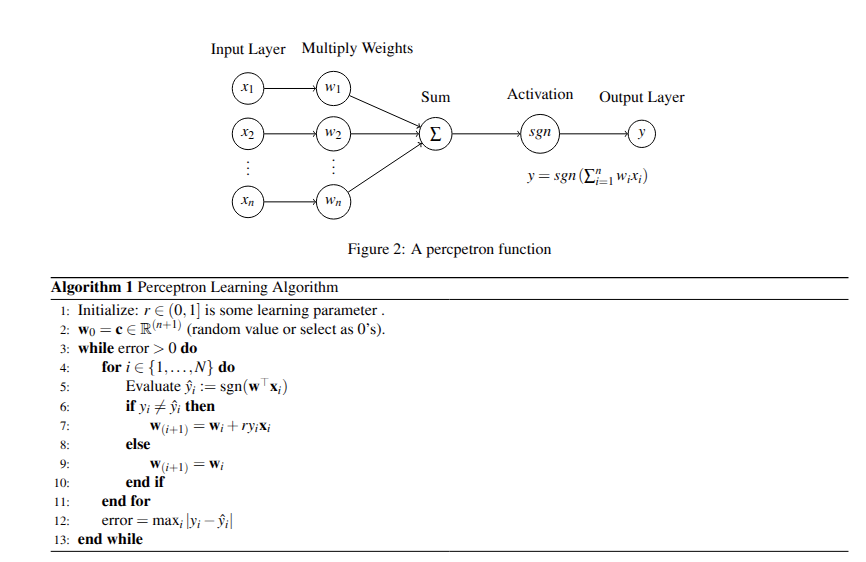

## Exercises

###3.1 Task 1
The goal of Task 1 is to implement logistic regression and generate Fig. 3.

**Task 1.1:** Generate a data set, $(x_iy_i)^N_{i=1} ⊂ ℝ{^2} × ℝ$ to practice binary classification. To generate $\{x_iϵℝ^2 : y_i =0$ for $i=1,...N\}$ to take 60 samples from $𝒩$
$
(\begin{bmatrix}
-1 \\
-1 \\
\end{bmatrix},
\begin{bmatrix}2&0\\
0&1
\end{bmatrix}).
$
To generate $\{x_iϵℝ^2 : y_i =0$ for $i=1,...N\}$ take 40 samples from $𝒩$
$
(\begin{bmatrix}
1 \\
1 \\
\end{bmatrix},
\begin{bmatrix}2&0\\
0&4
\end{bmatrix}).
$
Plot the data sample, this should look like Fig. 3 without the decision boundary.

Hint: $ε ∼ 𝒩 (μ,σ^2$
) means that ε has a normal distribution with mean μ and covariance matrix σ.

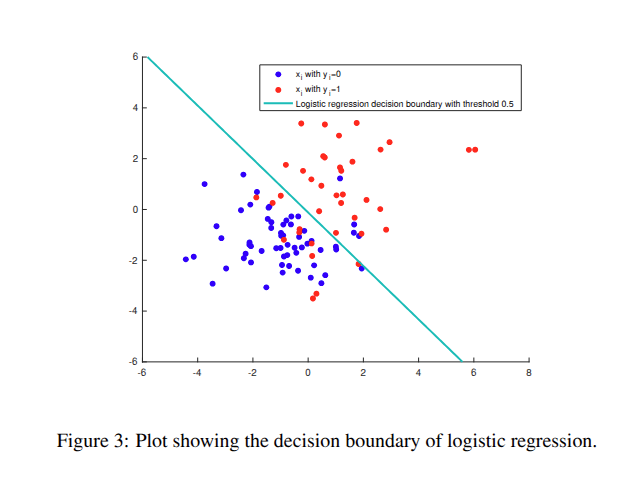

In [1]:
# @title Imports Needed for Lab
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.optimize import fsolve

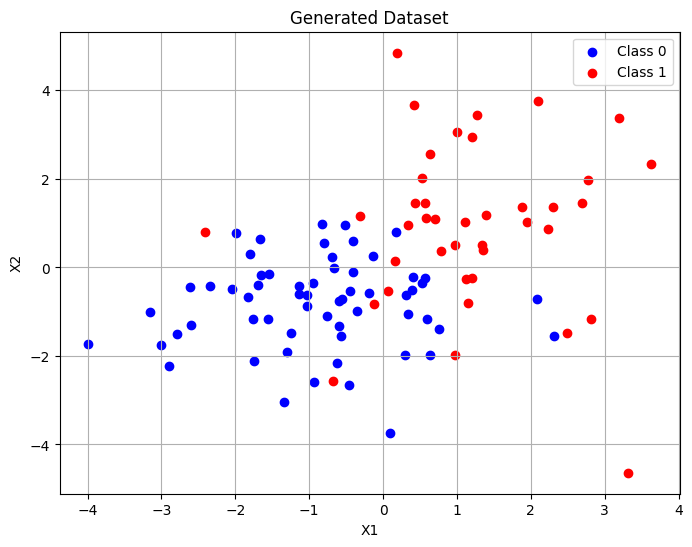

In [2]:
# @title Answer 1.1
# Define the parameters for class 0
mean0 = [-1, -1]
covariance0 = [[2, 0], [0, 1]]
# Generate samples for class 0
class0_data = np.random.multivariate_normal(mean0, covariance0, 60)

# Define the parameters for class 1
mean1 = [1, 1]
covariance1 = [[2, 0], [0, 4]]
# Generate samples for class 1
class1_data = np.random.multivariate_normal(mean1, covariance1, 40)

# Create labels for the two classes (0 and 1)
labels0 = np.zeros((60,))
labels1 = np.ones((40,))

# Combine data and labels for the complete dataset
X = np.vstack((class0_data, class1_data))
y = np.concatenate((labels0, labels1))

# Plot the generated dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Dataset')
plt.legend()
plt.grid(True)
plt.show()

**Task 1.2:** Recreate Fig. 3. For the data set generated in the previous task fit a logistic regression model and plot the decision
boundary resulting from a probability threshold of 0.5.
**Hint:** To find logostic regression parameters that fit the data set you will need to iterate Equation (3).

Optimized Parameters:
[-0.60478049  1.51080043  0.93273141]


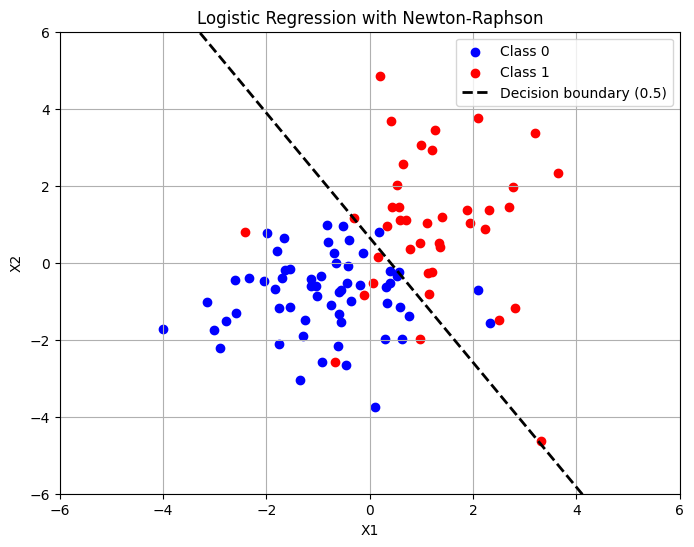

In [4]:
# @title Answer 1.2
# Initialise parameters
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Add column of ones
theta = np.zeros(X_bias.shape[1])  # Initialize theta
max_iterations = 100
epsilon = 1e-6

# Newton-Raphson optimization
for iteration in range(max_iterations):
    z = X_bias @ theta
    sigmoid = 1 / (1 + np.exp(-z))  # Logistic function
    W = np.diag((1 - sigmoid) * sigmoid)
    gradient = X_bias.T @ (y - sigmoid)
    Hessian = X_bias.T @ W @ X_bias
    try:
        delta_theta = np.linalg.solve(Hessian, gradient)
    except np.linalg.LinAlgError:
        print("Hessian is singular. Stopping optimization.")
        break
    theta += delta_theta
    if np.linalg.norm(delta_theta) < epsilon:
        break

print("Optimized Parameters:")
print(theta)

# Plot data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')

# Plot decision boundary where sigmoid = 0.5 → z = 0 → theta_0 + theta_1*x + theta_2*y = 0
x_vals = np.linspace(-6, 6, 100)
# Avoid division by zero if theta[2] is 0
if np.abs(theta[2]) > 1e-8:
    y_vals = -(theta[0] + theta[1] * x_vals) / theta[2]
    plt.plot(x_vals, y_vals, 'k--', linewidth=2, label='Decision boundary (0.5)')
else:
    plt.axvline(-theta[0]/theta[1], color='k', linestyle='--', linewidth=2, label='Decision boundary (0.5)')

plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression with Newton-Raphson')
plt.legend()
plt.grid(True)
plt.show()

### 3.2 Task 2
The goal of Task 2 is to implement the Perceptron Learning Algorithm and generate Fig. 4.

**Task 2.1:** Discuss any similarities and dissimilarities between logistic regression and the Perceptron Learning Algorithm.


###Answer 2.1


####
Similarities:
1. **Supervised Learning:** Both algorithms are supervised learning techniques, which means they require labeled training
data to learn the decision boundary.

2. **Iterative Learning:** Both algorithms use iterative techniques to update their parameters. This iterative learning process
continues until convergence or a predefined stopping criterion is met.
3. **Linear Decision Boundary:** Both logistic regression and the perceptron seek to find a linear decision boundary that
separates two classes in the feature space.


**Dissimilarities:**
1. **Output:** One of the key differences is in the output of these algorithms. Logistic Regression outputs probabilities,
specifically the probability that a given input belongs to a particular class. The output of the perceptron is a binary
classification decision (0 or 1), making it a more basic classifier.
2. **Perception of Misclassified Points:** In the Perceptron algorithm, all misclassified points contribute equally to the
updates and the algorithm terminates when all positive points are classified correctly. On the other hand, logistic
regression can allow for positive misclassified points, as shown in Fig. 3.
3. **Convergence Guarantee:** Logistic Regression is guaranteed to converge to a solution thanks to the log likelihood being
a convex objective function. The Perceptron, while often converging in practice, does not have such a strong theoretical
guarantee. It can oscillate if the data is not linearly separable.
4. **Learning Rate:** The Perceptron algorithm requires a user defined learning rate. Logistic regression on the other hand
uses the inverse of the hessian to get a learning rate (not user defined).
####

####
###**Task 2.2:**
 Generate a data set, $(x_iy_i)^N_{i=1} ⊂ ℝ{^3} × ℝ$, to practice binary classification. To generate  $\{x_iϵℝ^3 : y_i =0$ for $i=1,...N\}$ to take 60 samples from $𝒩$
$
(\begin{bmatrix}
-1 \\
-1 \\
-1\\
\end{bmatrix},
\begin{bmatrix}0.2&0&0\\
0&0.1&0\\
0&0&0.2
\end{bmatrix})$. To generate $\{x_iϵℝ^3 : y_i =0$ for $i=1,...N\}$ take 40 samples from $𝒩$
$
(\begin{bmatrix}
1 \\
1 \\
1\\
\end{bmatrix},
\begin{bmatrix}0.2&0&0\\
0&0.4&0\\
0&0&0.4
\end{bmatrix}).
$
Plot the data sample, this should look like Fig. 4 without the decision boundary.
**Hint:** $ε ∼ N (μ,σ^2)$ means that ε has a normal distribution with mean μ and covariance matrix σ.

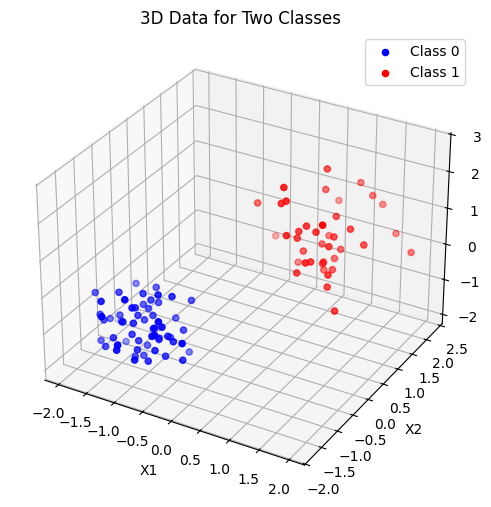

In [5]:
# @title Answer 2.2:
# Define the parameters for class 0
mean0 = [-1, -1,-1]
covariance0 = [[0.2, 0,0], [0, 0.1,0],[0,0,0.2]]

# Generate samples for class 0
class0_data = np.random.multivariate_normal(mean0, covariance0, 60)

# Define the parameters for class 1
mean1 = [1, 1,1]
covariance1 = [[0.2, 0,0], [0, 0.4,0],[0,0,0.4]]
# Generate samples for class 1
class1_data = np.random.multivariate_normal(mean1, covariance1, 40)

# Create labels for the two classes (0 and 1)
labels0 = np.zeros((60,))
labels1 = np.ones((40,))

# Combine data and labels for the complete dataset
X = np.vstack((class0_data, class1_data))
y = np.concatenate((labels0, labels1))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], X[y == 0][:, 2], color='blue', label='Class 0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], X[y == 1][:, 2], color='red', label='Class 1')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('3D Data for Two Classes')
ax.legend()
plt.show()

**Task 2.3:** Recreate Fig. 4. For the data set generated in the previous task fit execute the Perceptron Learning Algorithm (given
in Alg. 1). Initialize model weights as zeros, $w_0 = 0$, and learning rate as $r = 0.5$.
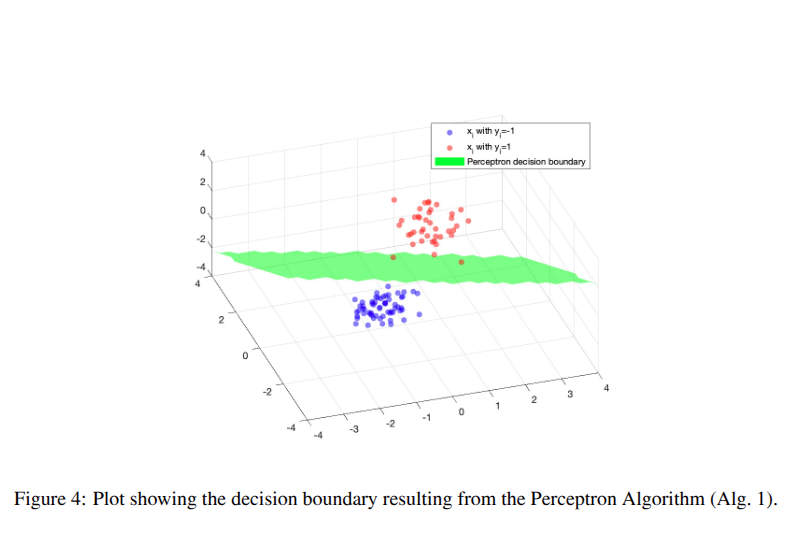

Optimized Weight Vector:
[[0.5       ]
 [0.70817237]
 [0.46733974]
 [0.63708228]]


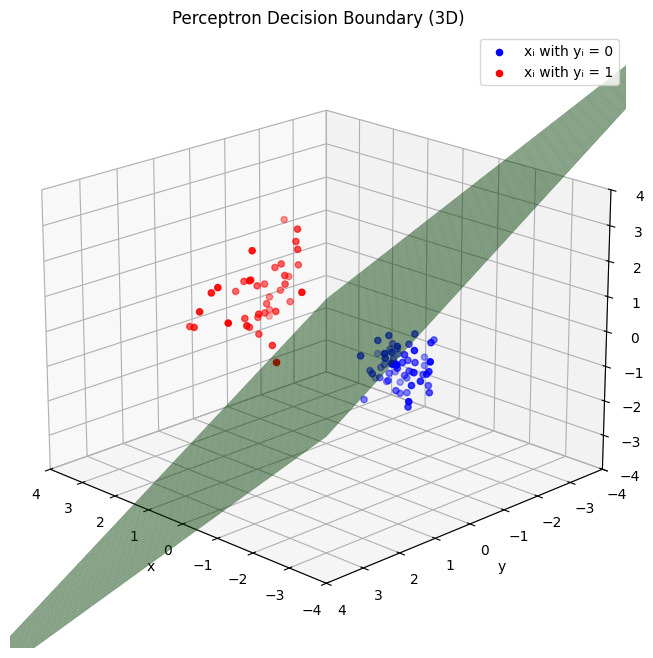

In [6]:
# @title Answer 2.3:
# Initialize parameters
# Add bias column to X
X = np.hstack((np.ones((X.shape[0], 1)), X))

r = 0.5  # Learning rate
w = np.zeros((X.shape[1], 1))  # Initialize weight vector as column vector
error = 1  # Initialize error

# While loop for training
while error > 0:
    error = 0  # Reset error
    for i in range(X.shape[0]):
        y_hat = np.sign(X[i, :].dot(w))[0]  # Predict y_hat (scalar)
        if y[i] != y_hat:
            w = w + r * y[i] * X[i, :].reshape(-1, 1)  # Update weight
            error = 1
            #break
        else:
            error = 0

#Print the optimised weight vector
print("Optimized Weight Vector:")
print(w)

#Plot the decision boundary
# Plot data points
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Class 0 and 1
ax.scatter(X[y == 0, 1], X[y == 0, 2], X[y == 0, 3], color='blue', label='xᵢ with yᵢ = 0')
ax.scatter(X[y == 1, 1], X[y == 1, 2], X[y == 1, 3], color='red', label='xᵢ with yᵢ = 1')

# Create a grid over x and y
xx, yy = np.meshgrid(np.linspace(-6, 6, 50), np.linspace(-6, 6, 50))

# Compute z for the plane: w0 + w1*x + w2*y + w3*z = 0 ⇒ z = -(w0 + w1*x + w2*y)/w3
# Avoid division by zero if w[3] is 0
if w[3] != 0:
    zz = -(w[0] + w[1] * xx + w[2] * yy) / w[3]

    # Plot decision boundary plane
    ax.plot_surface(xx, yy, zz, color='green', alpha=0.5, linewidth=0, antialiased=True)

# Limits and view
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])
ax.view_init(elev=20, azim=135)

# Labels
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend(loc='upper right')
plt.title("Perceptron Decision Boundary (3D)")
plt.show()

###Further Exploration
Now that you understand some classification methods modify the tasks and investigate what happens. Some suggestions of things you could try:
* Try higher dimensional data sets.
* Try to implement other classification techniques like $k$-nearest neighbourhood.
* Identify possible hyper-parameters in the models and use cross validation to tune these parameters.
* Is it possible to implement regularization into any of these algorithms?
* Implement various evaluation metrics such as accuracy, precision, recall, ROC curves, and AUC to assess the performance of the models.



